# Assignment: "Haberman Survival Data Set"

OBJECTIVE: Classify the range of person's who lived more than 5 years after the diagnose or not.

In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

haber = pd.read_csv('haberman.csv')

In [35]:
haber.shape

(306, 4)

In [36]:
#Q) How our dataset looks like?

haber

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


# Observation:

From the above Haberman dataset we can easily identify the column names.

In [37]:
haber['status'] = haber['status'].apply(lambda x:'Positive' if x == 1 else 'Negative')

#Uses above syntax from applied ai comment section.

Indication of Haberman Dataset: (In Column "Status")

1 = the patient survived 5 years or longer.

2 = the patient died within 5 year.

# Observation:

1) We used this function to make one of our column as identifier of person.

2) Since in the Data set all the columns are of integer type so here we convert 'Status' column as our diciding column of our dataset.

In [38]:
#haber['year'] += 1900

#We can use this function if we want to show the year in a correct way.

In [39]:
#(Q) Calculate the number of Positive and Negative cases?

haber['status'].value_counts()

Positive    225
Negative     81
Name: status, dtype: int64

# Observation:

1) As our deciding column doesn't have symmetry (i.e., Positive and Negative outputs), So we have to predict our result on many assumptions.

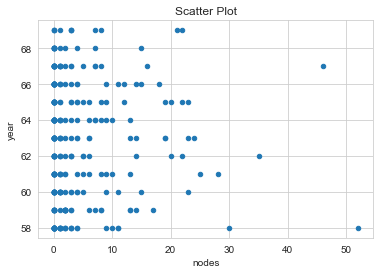

In [42]:
# 2-D Scatter Plot

haber.plot(x='nodes', y='year', kind='scatter')
plt.title('Scatter Plot')
plt.show()

#Doesn't tell much about plot. We have to some other methods to give a proper view on it.

In [43]:
#haber.describe()

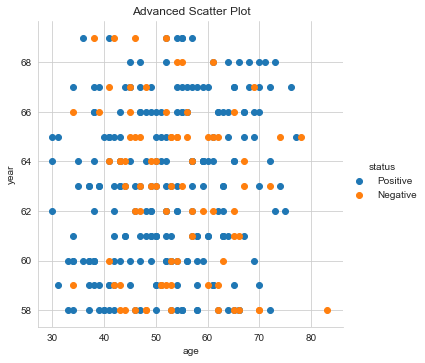

In [44]:
# 2-D Scatter plot with color-coding for Status of a Person

sns.set_style('whitegrid')
sns.FacetGrid(haber, hue='status', height=5)\
   .map(plt.scatter,'age','year')\
   .add_legend()
plt.title('Advanced Scatter Plot')
plt.show()

#Here we can't seperate Blue and Yellow dots.
#We try to seperate these by using multiple 2-D plots

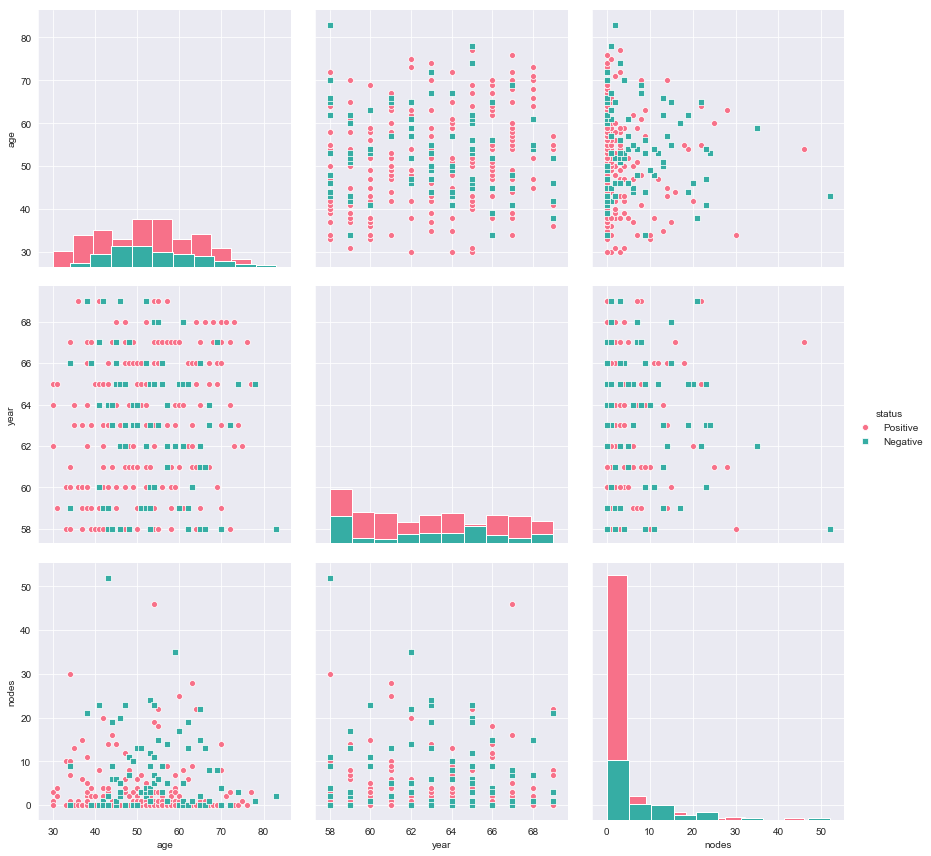

In [45]:
# Pair-Plot: pairwise scatter plot.

plt.close();
sns.set_style('darkgrid');
sns.pairplot(haber,hue='status',height=4,diag_kind = 'hist',palette = 'husl', markers = ['o','s']);
plt.show();



# Observation:

1) By doing Pair-Plot, we can somehow tell this, that in nodes vs year graph, we can see quite good difference between points of 2 status (Positive and Negative) in comparison to other plots.

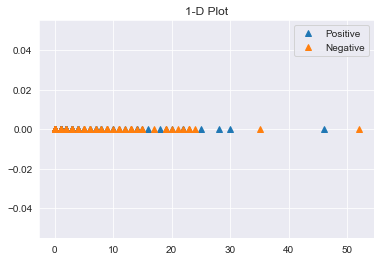

In [46]:
#1-D plot:

haber_positive = haber.loc[haber['status'] == 'Positive']
haber_negative = haber.loc[haber['status'] == 'Negative']

plt.plot(haber_positive["nodes"], np.zeros_like(haber_positive['nodes']), '^',label = 'Positive') 
plt.plot(haber_negative["nodes"], np.zeros_like(haber_negative['nodes']), '^',label = 'Negative') 

plt.title('1-D Plot')
plt.legend()
plt.show()

#Quite difficult to predict number of points at a position because many points are overlapping in 1-D.

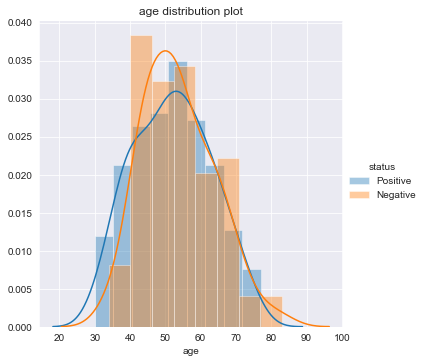

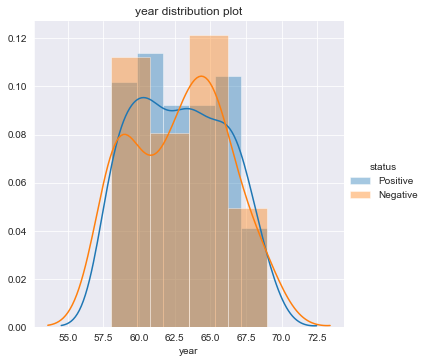

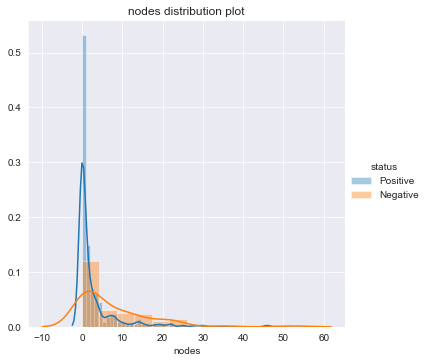

In [47]:
#distplot : distribution plot
def dist(feature):
    sns.FacetGrid(haber, hue = 'status', height = 5).map(sns.distplot, feature).add_legend()
    plt.title(feature + ' distribution plot')
    plt.show()

lst = ['age','year','nodes']
for i in lst:
    dist(i)

# PDF and CDF:

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


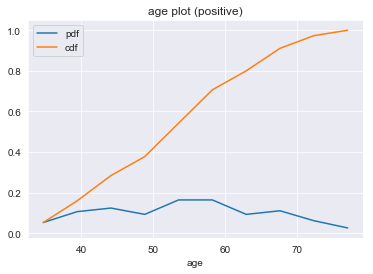

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


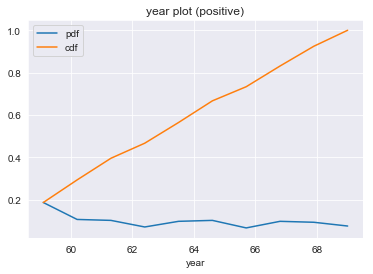

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


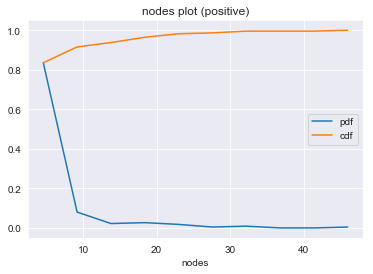

In [48]:
#PDF and CDF of Haberman Dataset by using 'age', 'year', 'nodes'.
def p_d_pos(feature):
    counts, bin_edges = np.histogram(haber_positive[feature], bins = 10)

    pdf = counts/sum(counts)
    print(pdf)
    print(bin_edges)

    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf, label='pdf')
    plt.plot(bin_edges[1:],cdf, label='cdf')
    plt.title(feature + ' plot (positive)')
    plt.xlabel(feature)
    plt.legend()

    plt.show()

lst = ['age','year','nodes']
for i in lst:
    p_d_pos(i)



[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


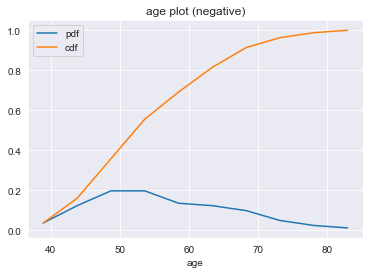

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


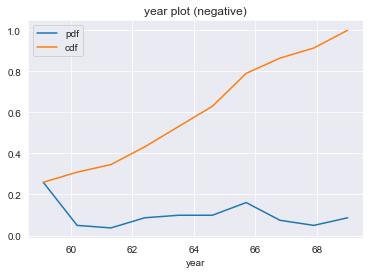

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


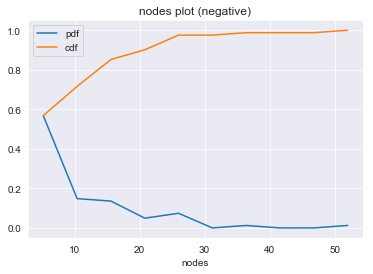

In [49]:
#counts, bin_edges = np.histogram(haber_positive['age'], bins = 20)
def p_c_neg(feature):
    counts, bin_edges = np.histogram(haber_negative[feature], bins = 10)

    pdf = counts/sum(counts)
    print(pdf)
    print(bin_edges)

    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf, label='pdf')
    plt.plot(bin_edges[1:],cdf, label='cdf')
    plt.xlabel(feature)
    plt.title(feature + ' plot (negative)')
    plt.legend()
    plt.show()

lst = ['age','year','nodes']
for i in lst:
    p_c_neg(i)

# Mean, Variance and Standard Deviation

In [50]:
#Mean and Std. Deviation of age on the basis of Positive and Negative Cases.

print("Means:")
print(np.mean(haber_positive["age"]))
print(np.mean(haber_negative["age"]))


print("\nStd-dev:");
print(np.std(haber_positive["age"]))
print(np.std(haber_negative["age"]))


Means:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


In [51]:
print("\nMedians:")
print(np.median(haber_positive["age"]))
print(np.median(haber_negative["age"]))


print("\nQuantiles:")
print(np.percentile(haber_positive["age"],np.arange(0, 101, 25)))
print(np.percentile(haber_negative["age"],np.arange(0, 101, 25)))


Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60. 77.]
[34. 46. 53. 61. 83.]


# Box-Plot with Whiskers

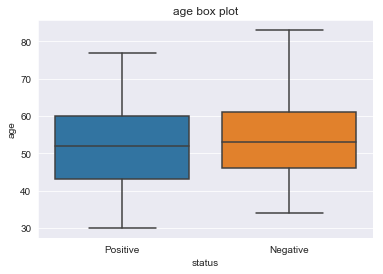

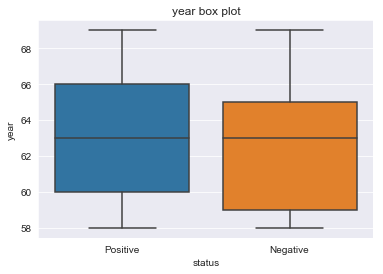

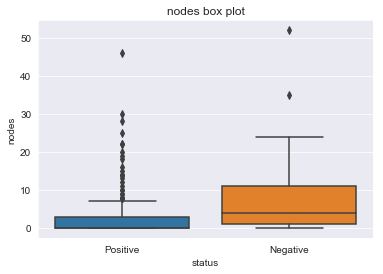

In [52]:
def box(feature):
    sns.boxplot(x='status',y=feature, data=haber)
    plt.title(feature + ' box plot')
    plt.show()

lst = ['age','year','nodes']
for i in lst:
    box(i)

# Violin Plot:

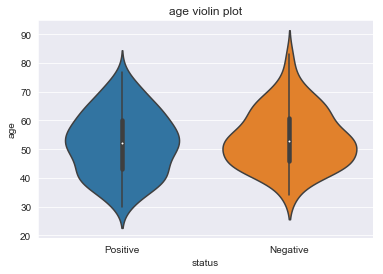

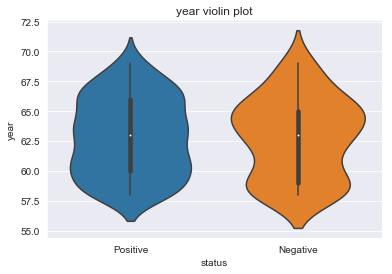

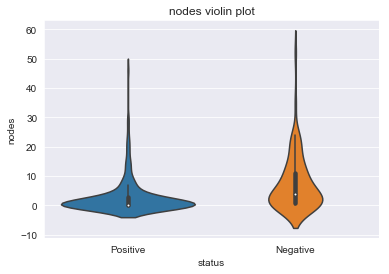

In [53]:
def violin(feature):
    sns.violinplot(x="status", y=feature, data=haber, size=8)
    plt.title(feature + ' violin plot')
    plt.show()


lst = ['age','year','nodes']
for i in lst:
    violin(i)

# Observations:

1) Around 85% of the people who diagnosed have less than or equal to 4 positive nodes.

2) The patients who diagnosed before 1960 have less chance to servive more than 5 years.[from Box and Violin Plot]

3) The patients who diagnosed after 1969 have higher chance to servive more than 5 years compare to others.[from Box and Violin Plot]